In [1]:
import dask.dataframe as dd
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from pathlib import Path

In [2]:
# Load Gopi+ Chuva data base
base_dir = Path.home()
manipulated_data_directory = base_dir / "NaMinhaRua" / "Ficheiros de dados Manipulados"
df = pd.read_csv(manipulated_data_directory/ 'GOPI&IPMA_MERGED_24h_Subseccao_final.csv')
df.head(2)



,dt_registo,Subseccao,Freguesia,BNFDRB,CA,CDPC2RD,CDRD,CDEEP,DDP,EOVRDJOPANVP,...,RRPDR,SOOLA,ÁAORM,Fim_de_Semana,Feriado,Inverno,Primavera,Verao,Outono,Chuva
0,2018-01-01,11066601201,Santo António,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,NaN
1,2018-01-01,11060200605,Alcântara,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,NaN


In [3]:
# Convert 'Chuva' column to numeric
df['Chuva'] = pd.to_numeric(df['Chuva'], errors='coerce')

# Count the number of days in which the rain was greater than 10
dias_chuva_maior_que_10 = (df['Chuva'] > 10).sum()
print(f"Número de dias em que a chuva foi maior que 10: {dias_chuva_maior_que_10}")

Número de dias em que a chuva foi maior que 10: 1261


In [4]:
#Show the related columns for the max value for Chuva
dia_max_precip = df.loc[df['Chuva'].idxmax()]

print(dia_max_precip)

dt_registo          2020-10-19
Subseccao          11066600601
Freguesia        Santo António
BNFDRB                   False
CA                       False
CDPC2RD                  False
CDRD                     False
CDEEP                    False
DDP                      False
EOVRDJOPANVP              True
EA                       False
FDDDCDPC2ROSM            False
G                        False
LDVPDDPVELDVP            False
OIEVPER                  False
PED                      False
RNADRDDRSU               False
RSRPDP                   False
RJPDR                    False
RMPDR                    False
RRPDR                    False
SOOLA                    False
ÁAORM                    False
Fim_de_Semana            False
Feriado                  False
Inverno                  False
Primavera                False
Verao                    False
Outono                    True
Chuva                48.416667
Name: 45695, dtype: object


In [5]:
#Number of unique values for subsection
unique_subseccao_count = df['Subseccao'].nunique()

print(unique_subseccao_count)

344


In [6]:
# Check the number of rows and data type of the atibutes
num_linhas = df.shape[0]

print(f"Número de linhas: {num_linhas}")
print(df.dtypes)

Número de linhas: 102081
dt_registo        object
Subseccao          int64
Freguesia         object
BNFDRB              bool
CA                  bool
CDPC2RD             bool
CDRD                bool
CDEEP               bool
DDP                 bool
EOVRDJOPANVP        bool
EA                  bool
FDDDCDPC2ROSM       bool
G                   bool
LDVPDDPVELDVP       bool
OIEVPER             bool
PED                 bool
RNADRDDRSU          bool
RSRPDP              bool
RJPDR               bool
RMPDR               bool
RRPDR               bool
SOOLA               bool
ÁAORM               bool
Fim_de_Semana       bool
Feriado             bool
Inverno             bool
Primavera           bool
Verao               bool
Outono              bool
Chuva            float64
dtype: object


In [7]:
#Check the nan values for chuva and perform drop if they exist
num_nan_chuva = df['Chuva'].isna().sum()
print(f"Número de valores NaN na coluna 'Chuva': {num_nan_chuva}")

# Remove lines where 'Chuva' is NaN
df.dropna(subset=['Chuva'], inplace=True)

Número de valores NaN na coluna 'Chuva': 19324


In [8]:
#  Convert 'Chuva' column to numeric
df['Chuva'] = pd.to_numeric(df['Chuva'], errors='coerce')

# Count the number of days in which the rain was greater than 10
dias_chuva_maior_que_10 = (df['Chuva'] > 10).sum()
print(f"Número de dias em que a chuva foi maior que 10: {dias_chuva_maior_que_10}")

Número de dias em que a chuva foi maior que 10: 1261


In [9]:
#"NUmber of rows"
num_linhas = df.shape[0]

print(f"Número de linhas: {num_linhas}")

Número de linhas: 82757


In [10]:
#Check again the if the max value of chuva remain in data base
max_chuva = df['Chuva'].max()

# Show the result
print(f"O valor máximo para 'Chuva' é: {max_chuva}")

O valor máximo para 'Chuva' é: 48.41666666666666


In [11]:
df.head(2)

,dt_registo,Subseccao,Freguesia,BNFDRB,CA,CDPC2RD,CDRD,CDEEP,DDP,EOVRDJOPANVP,...,RRPDR,SOOLA,ÁAORM,Fim_de_Semana,Feriado,Inverno,Primavera,Verao,Outono,Chuva
15290,2018-12-17,11066600603,Santo António,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,0.0
15291,2018-12-17,11063301201,Olivais,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,0.0


In [12]:
#Verify the number of values for Chuva>10
count_chuva_maior_10 = df[df['Chuva'] > 10].shape[0]

print(count_chuva_maior_10)

1261


In [55]:
#Uncomment to analyze by precipitation volume
#Aguaceiros fortes
#df['Chuva'] = df['Chuva'].apply(lambda x: True if x > 10 else False)
#Aguaceiros moderados
#df['Chuva'] = df['Chuva'].apply(lambda x: True if 2 <= x <= 10 else False)
# Aguaceiros fracos
df['Chuva'] = df['Chuva'].apply(lambda x: True if x!=0 and x <= 2 else False)
# Valor exploratório da regra
#df['Chuva'] = df['Chuva'].apply(lambda x: True if 0 < x < 5 else False)
# Impacto quando há chuva
#df['Chuva'] = df['Chuva'].apply(lambda x: True if x > 0 else False)

for col in df.select_dtypes(include='number').columns:
           df[col] = df[col].astype(bool)

# Define relevant columns for Apriori analysis
relevant_columns = ['BNFDRB', 'CA', 'CDPC2RD', 'CDRD', 'CDEEP', 'DDP', 
                    'EOVRDJOPANVP', 'EA', 'FDDDCDPC2ROSM', 'G', 'LDVPDDPVELDVP', 
                    'OIEVPER', 'PED', 'RNADRDDRSU', 'RSRPDP', 'RJPDR', 
                    'RMPDR', 'RRPDR', 'SOOLA', 'ÁAORM', 'Fim_de_Semana', 'Feriado','Chuva','Inverno','Outono','Primavera','Verao']

# Keep only the relevant columns in the basket
basket = df[relevant_columns]

# Optimize data types by converting boolean columns to int8 (takes less memory)
basket = basket.astype('int8')

# Apply fpgrowth algorithm with minimum support
start_time = time.time()
frequent_itemsets = fpgrowth(basket, min_support=0.01, use_colnames=True)
#0.0027
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
fp_growth_exec_time = time.time() - start_time
print("Itemsets frequentes:\n", frequent_itemsets.head(25))


C:\Users\jmvdp\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Itemsets frequentes:
      support                   itemsets
0   0.357517                    (RMPDR)
24  0.260546                   (Outono)
22  0.252220                (Primavera)
1   0.213843                  (Inverno)
8   0.196165             (EOVRDJOPANVP)
12  0.113670                    (Chuva)
21  0.094663            (Fim_de_Semana)
54  0.093418            (RMPDR, Outono)
53  0.085419         (RMPDR, Primavera)
25  0.079039           (RMPDR, Inverno)
34  0.053651  (Primavera, EOVRDJOPANVP)
35  0.050787     (EOVRDJOPANVP, Outono)
7   0.046473                    (RJPDR)
41  0.044745            (Chuva, Outono)
39  0.042848             (RMPDR, Chuva)
13  0.040009                       (CA)
6   0.039223               (RNADRDDRSU)
37  0.037072           (Chuva, Inverno)
19  0.036468                      (PED)
32  0.035453    (Inverno, EOVRDJOPANVP)
2   0.032819                      (DDP)
11  0.032662                    (ÁAORM)
17  0.031852            (LDVPDDPVELDVP)
5   0.031466      

In [17]:
# data type of the atibutes
print(df.dtypes)

dt_registo       object
Subseccao          bool
Freguesia        object
BNFDRB             bool
CA                 bool
CDPC2RD            bool
CDRD               bool
CDEEP              bool
DDP                bool
EOVRDJOPANVP       bool
EA                 bool
FDDDCDPC2ROSM      bool
G                  bool
LDVPDDPVELDVP      bool
OIEVPER            bool
PED                bool
RNADRDDRSU         bool
RSRPDP             bool
RJPDR              bool
RMPDR              bool
RRPDR              bool
SOOLA              bool
ÁAORM              bool
Fim_de_Semana      bool
Feriado            bool
Inverno            bool
Primavera          bool
Verao              bool
Outono             bool
Chuva              bool
dtype: object


In [56]:
# Generate association rules with lift metric and minimum threshold
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.01)
rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])
print("Regras de associação:\n", rules.head(25))

Regras de associação:
            antecedents       consequents  antecedent support  \
31     (RMPDR, Outono)           (Chuva)            0.093418   
34             (Chuva)   (RMPDR, Outono)            0.113670   
14             (Chuva)         (Inverno)            0.113670   
15           (Inverno)           (Chuva)            0.213843   
30      (RMPDR, Chuva)          (Outono)            0.042848   
35            (Outono)    (RMPDR, Chuva)            0.260546   
11            (Outono)           (Chuva)            0.260546   
10             (Chuva)          (Outono)            0.113670   
39         (Primavera)              (CA)            0.252220   
38                (CA)       (Primavera)            0.040009   
43    (RMPDR, Inverno)           (Chuva)            0.079039   
46             (Chuva)  (RMPDR, Inverno)            0.113670   
42      (RMPDR, Chuva)         (Inverno)            0.042848   
47           (Inverno)    (RMPDR, Chuva)            0.213843   
25     (Fim_de_Se

FP-Growth execution time: 0.10156917572021484
Itemsets frequentes:
      support                       itemsets
8   0.352560                        (RMPDR)
13  0.259596                       (Outono)
1   0.254924                    (Primavera)
4   0.215451                      (Inverno)
7   0.194707                 (EOVRDJOPANVP)
2   0.094695                (Fim_de_Semana)
76  0.091916                (Outono, RMPDR)
30  0.085955             (Primavera, RMPDR)
40  0.077537               (Inverno, RMPDR)
48  0.053047      (EOVRDJOPANVP, Primavera)
50  0.051315         (Outono, EOVRDJOPANVP)
9   0.048375                        (RJPDR)
15  0.042414                           (CA)
10  0.039675                   (RNADRDDRSU)
23  0.036936                          (PED)
47  0.034922        (EOVRDJOPANVP, Inverno)
19  0.032545                        (ÁAORM)
16  0.032505                          (DDP)
11  0.032183                       (RSRPDP)
14  0.030974                        (SOOLA)
21  0.03

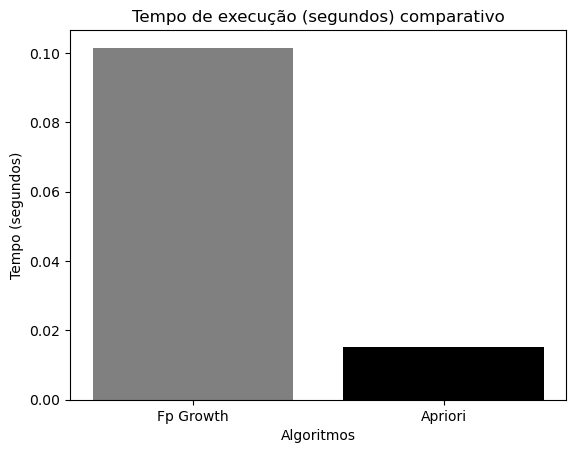

In [13]:
# Define relevant columns for Apriori analysis
relevant_columns = ['BNFDRB', 'CA', 'CDPC2RD', 'CDRD', 'CDEEP', 'DDP', 
                    'EOVRDJOPANVP', 'EA', 'FDDDCDPC2ROSM', 'G', 'LDVPDDPVELDVP', 
                    'OIEVPER', 'PED', 'RNADRDDRSU', 'RSRPDP', 'RJPDR', 
                    'RMPDR', 'RRPDR', 'SOOLA', 'ÁAORM', 'Fim_de_Semana', 'Feriado','Chuva','Inverno','Outono','Primavera','Verao']

# Keep only the relevant columns in the basket
basket = df[relevant_columns]
basket_sample = basket.sample(frac=0.3, random_state=42)

# Apply fpgrowth algorithm with minimum support
start_time = time.time()
frequent_itemsets = fpgrowth(basket_sample, min_support=0.0027, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
fp_growth_exec_time = time.time() - start_time
print("FP-Growth execution time:", fp_growth_exec_time)
print("Itemsets frequentes:\n", frequent_itemsets.head(30))

# Apply apriori algorithm with minimum support
start_time = time.time()
frequent_itemsets_apriori = apriori(basket_sample, min_support=0.0027, use_colnames=True, low_memory=True)
frequent_itemsets_apriori = frequent_itemsets_apriori.sort_values(by='support', ascending=False)
apriori_exec_time = time.time() - start_time
print("Apriori execution time:", apriori_exec_time)
print("Itemsets frequentes Apriori:\n", frequent_itemsets_apriori.head(30))

# Function to compare execution times
def compare_time_exec(algo1, algo2):
    execution_times = [algo1[1], algo2[1]]
    algo_names = [algo1[0], algo2[0]]
    y = np.arange(len(algo_names))
    
    plt.bar(y, execution_times, color=['grey', 'black'])
    plt.xticks(y, algo_names)
    plt.xlabel('Algoritmos')
    plt.ylabel('Tempo (segundos)')
    plt.title("Tempo de execução (segundos) comparativo")
    plt.show()

# Prepare the algorithm execution time data for comparison
algo1 = ['Fp Growth', fp_growth_exec_time]
algo2 = ['Apriori', apriori_exec_time]


# Call the comparison function
compare_time_exec(algo1, algo2)


In [16]:
#df = pd.read_csv("Merge_Gopi_With_Ipma_Precacumulada_Estacao.csv")
df.head(2)
chuva_frequency = df['Chuva'].max()

# Print the frequency
print(chuva_frequency)

True


In [57]:
# Filter rules involving 'Chuva'
rules_pressão_acumulada = rules[(rules['antecedents'].apply(lambda x: 'Chuva' in str(x))) |
                      (rules['consequents'].apply(lambda x: 'Chuva' in str(x)))]

print("rules_pressão_acumulada 'pressão_acumulada':\n", rules_pressão_acumulada.head(26))



rules_pressão_acumulada 'pressão_acumulada':
            antecedents         consequents  antecedent support  \
31     (RMPDR, Outono)             (Chuva)            0.093418   
34             (Chuva)     (RMPDR, Outono)            0.113670   
14             (Chuva)           (Inverno)            0.113670   
15           (Inverno)             (Chuva)            0.213843   
30      (RMPDR, Chuva)            (Outono)            0.042848   
35            (Outono)      (RMPDR, Chuva)            0.260546   
11            (Outono)             (Chuva)            0.260546   
10             (Chuva)            (Outono)            0.113670   
43    (RMPDR, Inverno)             (Chuva)            0.079039   
46             (Chuva)    (RMPDR, Inverno)            0.113670   
42      (RMPDR, Chuva)           (Inverno)            0.042848   
47           (Inverno)      (RMPDR, Chuva)            0.213843   
66  (Chuva, Primavera)             (RMPDR)            0.024179   
67             (RMPDR)  (Chuva

In [58]:
# This code only serves to present the data in a shorter form in chapter 7 of the dissertation
# Select main columns
rules_selected = rules_pressão_acumulada[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


#  View the formatted table
print("Regras que envolvem Chuva (Top 25):\n")
print(rules_selected.head(25))

Regras que envolvem Chuva (Top 25):

           antecedents         consequents   support  confidence      lift
31     (RMPDR, Outono)             (Chuva)  0.016965    0.181607  1.597662
34             (Chuva)     (RMPDR, Outono)  0.016965    0.149251  1.597662
14             (Chuva)           (Inverno)  0.037072    0.326140  1.525139
15           (Inverno)             (Chuva)  0.037072    0.173363  1.525139
30      (RMPDR, Chuva)            (Outono)  0.016965    0.395939  1.519652
35            (Outono)      (RMPDR, Chuva)  0.016965    0.065115  1.519652
11            (Outono)             (Chuva)  0.044745    0.171737  1.510839
10             (Chuva)            (Outono)  0.044745    0.393643  1.510839
43    (RMPDR, Inverno)             (Chuva)  0.012809    0.162055  1.425658
46             (Chuva)    (RMPDR, Inverno)  0.012809    0.112682  1.425658
42      (RMPDR, Chuva)           (Inverno)  0.012809    0.298928  1.397888
47           (Inverno)      (RMPDR, Chuva)  0.012809    0.05989

In [10]:

# Filter rules involving 'Feriado'
rules_holiday = rules[(rules['antecedents'].apply(lambda x: 'Feriado' in str(x))) |
                      (rules['consequents'].apply(lambda x: 'Feriado' in str(x)))]

print("Regras que envolvem 'Feriado':\n", rules_holiday)

Regras que envolvem 'Feriado':
 Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [15]:
# Filter rules involving 'Fim_de_Semana'
rules_pressão_acumulada = rules[(rules['antecedents'].apply(lambda x: 'Fim_de_Semana' in str(x))) |
                      (rules['consequents'].apply(lambda x: 'Fim_de_Semana' in str(x)))]

print("Fim_de_Semana':\n", rules_pressão_acumulada)


Fim_de_Semana':
                        antecedents                    consequents  \
107                (Fim_de_Semana)                 (EOVRDJOPANVP)   
110         (Chuva, Fim_de_Semana)                 (EOVRDJOPANVP)   
113                (Fim_de_Semana)          (Chuva, EOVRDJOPANVP)   
106                 (EOVRDJOPANVP)                (Fim_de_Semana)   
108          (Chuva, EOVRDJOPANVP)                (Fim_de_Semana)   
111                 (EOVRDJOPANVP)         (Chuva, Fim_de_Semana)   
115         (Chuva, Fim_de_Semana)                      (Inverno)   
119                (Fim_de_Semana)               (Chuva, Inverno)   
121                (Fim_de_Semana)                      (Inverno)   
114               (Chuva, Inverno)                (Fim_de_Semana)   
118                      (Inverno)         (Chuva, Fim_de_Semana)   
120                      (Inverno)                (Fim_de_Semana)   
19                 (Fim_de_Semana)                        (Chuva)   
90         (Outon

In [16]:
#Filter rules involving 'Seasons'
seasons = ['Inverno', 'Verao', 'Primavera', 'Outono']
rules_seasons = rules[rules['antecedents'].apply(lambda x: any(season in str(x) for season in seasons)) |
                      rules['consequents'].apply(lambda x: any(season in str(x) for season in seasons))]

print("Regras que envolvem estações:\n", rules_seasons.head(20))

Regras que envolvem estações:
             antecedents         consequents  antecedent support  \
132                (CA)         (Primavera)            0.038283   
134         (Chuva, CA)         (Primavera)            0.038283   
138                (CA)  (Chuva, Primavera)            0.038283   
133         (Primavera)                (CA)            0.242494   
135  (Chuva, Primavera)                (CA)            0.242494   
139         (Primavera)         (Chuva, CA)            0.242494   
192            (RSRPDP)            (Outono)            0.030789   
194     (Chuva, RSRPDP)            (Outono)            0.030789   
198            (RSRPDP)     (Chuva, Outono)            0.030789   
193            (Outono)            (RSRPDP)            0.272372   
195     (Chuva, Outono)            (RSRPDP)            0.272372   
199            (Outono)     (Chuva, RSRPDP)            0.272372   
201               (DDP)         (Primavera)            0.033562   
203        (Chuva, DDP)        